## LangChain Tutorial - Part 3: Retrievers

#### Setting UP...

Before starting this tutorial, please follow the steps bellow:
  
1. **Download the PDF Article to be used in this Tutorial**:
    - Article: [Pancreatic Cancer: A Review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9363152/).
    - Create the folder `./documents` (if necessary).
    - Download the article to the `./documents` folder.
        - Expected: ./documents/nihms-1828057.pdf

2. **Load the `.env` File**

In [1]:
%load_ext dotenv
%dotenv

In [1]:
# This is the question to be answered
question = "What percentage of patients have pathogenic germline gene variants?"

In [2]:
# Install the packages langchain_community and pypdf
%pip install --upgrade langchain_community pypdf

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import the class PyPDFLoader from the package langchain_community.document_loaders
from langchain_community.document_loaders import PyPDFLoader

In [4]:
# Create an instance of PyPDFLoader
# Inform the PDF file to be loaded
loader = PyPDFLoader("./documents/nihms-1828057.pdf")

In [9]:
# Load and split the PDF file in chunks of data
# You can pass an optional text splitter instance to the `load_and_split` method
# When it is not informed, the method uses a default RecursiveCharacterTextSplitter instance:
# - chunk_size...: 4000 (max number of characters per chunk)
# - chunk_overlap:  200 (number of characters to overlap between chunks)
pages = loader.load_and_split()
print(len(pages))

28


In [10]:
# `pages` contains a list of 28 Document object

# Here's Page 18:
# Document(
#   metadata={'source': './documents/nihms-1828057.pdf', 'page': 18}, 
#   page_content='Figure 1. \nSpectrum of Localized Pancreatic CancerPark et al. Page 19\nJAMA . Author manuscript; available in PMC 2022 August 09.\nAuthor Manuscript Author Manuscript Author Manuscript Author Manuscript'
# )

pages

[Document(metadata={'source': './documents/nihms-1828057.pdf', 'page': 0}, page_content='Pancreatic Cancer: A Review\nWungki Park, MD ,\nDepartment of Medicine, Memorial Sloan Kettering Cancer Center, New York, New York\nDavid M. Rubenstein Center for Pancreatic Cancer Research, New York, New York\nDepartment of Medicine, Weill Cornell Medical College, New York, New York\nParker Institute for Cancer Immunotherapy, San Francisco, California\nAkhil Chawla, MD ,\nDepartment of Surgery, Northwestern Medicine Regional Medical Group, Northwestern University \nFeinberg School of Medicine, Chicago, Illinois\nRobert H. Lurie Comprehensive Cancer Center, Chicago, Illinois\nEileen M. O’Reilly, MD\nDepartment of Medicine, Memorial Sloan Kettering Cancer Center, New York, New York\nDavid M. Rubenstein Center for Pancreatic Cancer Research, New York, New York\nDepartment of Medicine, Weill Cornell Medical College, New York, New York\nAbstract\nIMPORTANCE— Pancreatic ductal adenocarcinoma (PDAC) is a

In [11]:
# Import the class RecursiveCharacterTextSplitter from the package langchain.text_splitter
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [12]:
# Create an instance of RecursiveCharacterTextSplitter with:
# - chunk_size...: 1000 (max number of characters per chunk)
# - chunk_overlap:   20 (number of characters to overlap between chunks)
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)

# Example with chunk_size=8 and chunk_overlap=3
# Data...: _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
# Chunk-1: _ _ _ _ _ _ _ _  
# Chunk-2:           _ _ _ _ _ _ _ _
# Chunk-3:                     _ _ _ _ _ _ _ _ 
# Chunk-4:                               _ _ _ _ _ _ _ _
# Chunk-5:                                         _ _ _ _ _ _ _ _
# Chunk-6:                                                   _ _ _ _ _


In [14]:
# Now split the pages of the PDF file
documents = text_splitter.split_documents(pages)

In [15]:
# `pages` contains a list of 28 Document object

# Here's Page 18:
# Document(
#   metadata={'source': './documents/nihms-1828057.pdf', 'page': 18}, 
#   page_content='Figure 1. \nSpectrum of Localized Pancreatic CancerPark et al. Page 19\nJAMA . Author manuscript; available in PMC 2022 August 09.\nAuthor Manuscript Author Manuscript Author Manuscript Author Manuscript'
# )

documents

[Document(metadata={'source': './documents/nihms-1828057.pdf', 'page': 0}, page_content='Pancreatic Cancer: A Review\nWungki Park, MD ,\nDepartment of Medicine, Memorial Sloan Kettering Cancer Center, New York, New York\nDavid M. Rubenstein Center for Pancreatic Cancer Research, New York, New York\nDepartment of Medicine, Weill Cornell Medical College, New York, New York\nParker Institute for Cancer Immunotherapy, San Francisco, California\nAkhil Chawla, MD ,\nDepartment of Surgery, Northwestern Medicine Regional Medical Group, Northwestern University \nFeinberg School of Medicine, Chicago, Illinois\nRobert H. Lurie Comprehensive Cancer Center, Chicago, Illinois\nEileen M. O’Reilly, MD\nDepartment of Medicine, Memorial Sloan Kettering Cancer Center, New York, New York\nDavid M. Rubenstein Center for Pancreatic Cancer Research, New York, New York\nDepartment of Medicine, Weill Cornell Medical College, New York, New York\nAbstract\nIMPORTANCE— Pancreatic ductal adenocarcinoma (PDAC) is a

In [ ]:
print(f"{len(pages)} vc {len(documents)}")

In [13]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()

In [14]:
# pip install faiss-cpu
from langchain_community.vectorstores import FAISS

In [16]:
vector = FAISS.from_documents(documents, embeddings)

In [ ]:
vector.similarity_search_with_score(question)

# [(Document(metadata={'source': './documents/nihms-1828057.pdf', 'page': 3}, page_content='to increasing rates of obesity and diabetes, which are potentially modifiable risk factors for \nPDAC.\nAbout 3.8% to 9.7% of patients with PDAC have pathogenic germline gene variants \nthat increase susceptibility to PDAC. These variants occur mostly in DNA damage repair \ngenes.25–27 The most common variants in PDAC include BRCA2 , BRCA1  (hereditary breast \nand ovary cancer syndrome), and ATM  (ataxia telangiectasia syndrome). Germline BRCA2 \nvariants are associated with an increased risk for PDAC (OR, 9.07 [95% CI, 6.33–12.98]) \nmore commonly than BRCA1  (OR, 2.95 [95% CI, 1.49–5.60]) or ATM  variants (OR, \n8.96 [95% CI, 6.12–12.98]).28 Uncommon (1% of patients with PDAC) but therapeutically \nimportant inheritable germline variants also occur in PDAC in mismatch repair deficiency \ngenes MLH1 , MSH2 , MSH6 , and PMS2  as part of Lynch syndrome.29 In 2019, the National \nComprehensive Cancer Network guidelines recommended that all patients newly diagnosed'),
#   0.2893287),
#  (Document(metadata={'source': './documents/nihms-1828057.pdf', 'page': 17}, page_content='Hereditary breast and ovary cancer syndrome ( BRCA1/2 , PALB2 ; 5%–9%)\nAtaxia-telangiectasia ( ATM ; approximately 3%–4%)\nFamilial atypical multiple mole and melanoma syndrome ( CDKN2A , p16; <1%)\nLynch syndrome ( MLH1 , MSH2 , MSH6 , PMS2 , EPCAM ; <1%)\nHereditary pancreatitis ( PRSS1 , SPINK1 ; <1%)\nPeutz-Jeghers syndrome ( STK11 ; <1%)\nAbbreviation: AJCC, American Joint Committee on Cancer.\naPercentages indicate the frequency per 100 unselected patients diagnosed with pancreas cancer.Park et al. Page 18\nJAMA . Author manuscript; available in PMC 2022 August 09.\nAuthor Manuscript Author Manuscript Author Manuscript Author Manuscript'),
#   0.31989175),
#  (Document(metadata={'source': './documents/nihms-1828057.pdf', 'page': 1}, page_content='7% of patients with a BRCA  pathogenic germline variant and metastatic PDAC, olaparib, a \npoly (adenosine diphosphate [ADB]-ribose) polymerase inhibitor, is a maintenance option that \nimproves progression-free survival following initial platinum-based therapy.\nCONCLUSIONS AND RELEVANCE— Approximately 60 000 new cases of PDAC are \ndiagnosed per year, and approximately 50% of patients have advanced disease at diagnosis. The \nincidence of PDAC is increasing. Currently available cytotoxic therapies for advanced disease \nare modestly effective. For all patients, multidisciplinary management, comprehensive germline \ntesting, and integrated supportive care are recommended.\nApproximately 60 430 new diagnoses of pancreatic cancer are anticipated in the US in \n2021.1 The incidence is rising at a rate of 0.5% to 1.0% per year, and pancreatic cancer \nis projected to become the second-leading cause of cancer death by 2030 in the US.1,2'),
#   0.3317449),
#  (Document(metadata={'source': './documents/nihms-1828057.pdf', 'page': 12}, page_content='Syndrome and Cancer Project. Cancer Epidemiol Biomarkers Prev. 2010;19(9):2307–2317. \ndoi:10.1158/1055-9965.EPI-10-0234 [PubMed: 20826833] \n24. Sung H, Siegel RL, Rosenberg PS, Jemal A. Emerging cancer trends among young adults in the \nUSA: analysis of a population-based cancer registry. Lancet Public Health. 2019;4(3):e137–e147. \ndoi:10.1016/S2468-2667(18)30267-6 [PubMed: 30733056] \n25. Shindo K, Yu J, Suenaga M, et al. Deleterious germline mutations in patients with apparently \nsporadic pancreatic adenocarcinoma. J Clin Oncol. 2017;35(30):3382–3390. doi:10.1200/\nJCO.2017.72.3502 [PubMed: 28767289] \n26. Hu C, Hart SN, Polley EC, et al. Association between inherited germline mutations in cancer \npredisposition genes and risk of pancreatic cancer. JAMA. 2018;319(23):2401–2409. doi:10.1001/\njama.2018.6228 [PubMed: 29922827] \n27. Golan T, Kindler HL, Park JO, et al. Geographic and ethnic heterogeneity of germline BRCA1  or'),
#   0.34655964)]

In [20]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template(
"""
Answer the following question based on the provided context.

If the context did not answer the question, do the following:
    1. Mention that you could not find exact answer;
    2. Provide a summary of the context.

Context:
{context}

Question:
{question}

Your response:

"""
)

In [21]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()

In [22]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()

In [23]:
retriever = vector.as_retriever()

In [25]:
from langchain_core.runnables import RunnableParallel, RunnablePassthrough

setup_and_retrieval = RunnableParallel(
    {"context": retriever, "question": RunnablePassthrough()}
)

In [26]:
chain = setup_and_retrieval | prompt | llm | output_parser

In [27]:
response = chain.invoke(question)

In [ ]:
print(f"Question:\n{question}\n\nAnswer:\n{response}")

# Question:
# What percentage of patients have pathogenic germline gene variants?
#
# Answer:
# Based on the provided context, it is mentioned that about 3.8% to 9.7% of patients with PDAC have pathogenic germline gene variants. 
# 
# Therefore, the percentage of patients with pathogenic germline gene variants ranges from 3.8% to 9.7%.

In [29]:
# We now can open the pdf and verify if the answer is there.
!open ./documents/nihms-1828057.pdf

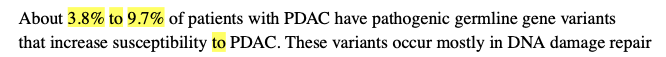